In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
!pip install pivottablejs
from pivottablejs import pivot_ui
from IPython.display import HTML
sns.set(color_codes=True)
from warnings import filterwarnings
filterwarnings("ignore")
from scipy.stats import norm

# Problem 1 :

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).


<font color=blue>Overview:</font>

In [2]:
df=pd.read_csv('Wholesale+Customers+Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [4]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [5]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440,NaN,NaN,NaN,220.5,127.161,1,110.75,220.5,330.25,440
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440,NaN,NaN,NaN,12000.3,12647.3,3,3127.75,8504,16933.8,112151
Milk,440,NaN,NaN,NaN,5796.27,7380.38,55,1533,3627,7190.25,73498
Grocery,440,NaN,NaN,NaN,7951.28,9503.16,3,2153,4755.5,10655.8,92780
Frozen,440,NaN,NaN,NaN,3071.93,4854.67,25,742.25,1526,3554.25,60869
Detergents_Paper,440,NaN,NaN,NaN,2881.49,4767.85,3,256.75,816.5,3922,40827
Delicatessen,440,NaN,NaN,NaN,1524.87,2820.11,3,408.25,965.5,1820.25,47943


In [6]:
df.isna().sum().sort_values(ascending=False)

Delicatessen        0
Detergents_Paper    0
Frozen              0
Grocery             0
Milk                0
Fresh               0
Region              0
Channel             0
Buyer/Spender       0
dtype: int64

In [7]:
df.isnull().sum().sort_values(ascending=False)

Delicatessen        0
Detergents_Paper    0
Frozen              0
Grocery             0
Milk                0
Fresh               0
Region              0
Channel             0
Buyer/Spender       0
dtype: int64

In [8]:
df.shape

(440, 9)

In [9]:
df.duplicated().sum()

0

## 1.1 ). Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [10]:
df['Total_Spent']=(df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper'])
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spent
0,1,Retail,Other,12669,9656,7561,214,2674,1338,32774
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,31490
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,28766
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,25593
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,40915


In [11]:
df['Region'].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

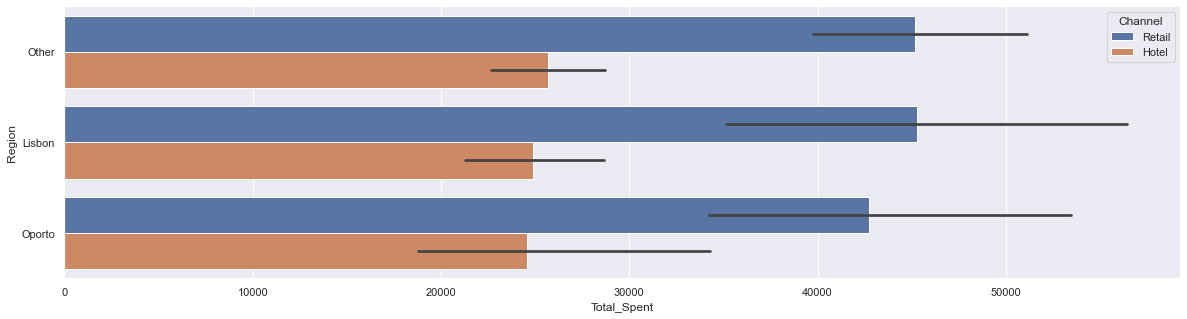

In [88]:
sns.barplot(df['Total_Spent'],df['Region'],hue=df['Channel'])
plt.rcParams["figure.figsize"]=(20,5)

## <font color= Green>Observation:</font>

So, as per observation we found that "Retail" Channel of "Lisbon" Region spent the most and "Hotel" Channel of "Oporto" Region spent the least.

## 1.2 ). There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [84]:
table=round(pd.pivot_table(df,values=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'],
                     index=['Channel','Region'], aggfunc=np.mean),2)

table

Delicatessen  Detergents_Paper     Fresh   Frozen   Grocery  \
Channel Region                                                                
Hotel   Lisbon       1197.15            950.53  12902.25  3127.32   4026.14   
        Oporto       1105.89            482.71  11650.54  5745.04   4395.50   
        Other        1518.28            786.68  13878.05  3656.90   3886.73   
Retail  Lisbon       1871.94           8225.28   5200.00  2584.11  18471.94   
        Oporto       1239.00           8410.26   7289.79  1540.58  16326.32   
        Other        1826.21           6899.24   9831.50  1513.20  15953.81   

                    Milk  
Channel Region            
Hotel   Lisbon   3870.20  
        Oporto   2304.25  
        Other    3486.98  
Retail  Lisbon  10784.00  
        Oporto   9190.79  
        Other   10981.01

In [14]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440,NaN,NaN,NaN,220.5,127.161,1,110.75,220.5,330.25,440
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440,NaN,NaN,NaN,12000.3,12647.3,3,3127.75,8504,16933.8,112151
Milk,440,NaN,NaN,NaN,5796.27,7380.38,55,1533,3627,7190.25,73498
Grocery,440,NaN,NaN,NaN,7951.28,9503.16,3,2153,4755.5,10655.8,92780
Frozen,440,NaN,NaN,NaN,3071.93,4854.67,25,742.25,1526,3554.25,60869
Detergents_Paper,440,NaN,NaN,NaN,2881.49,4767.85,3,256.75,816.5,3922,40827
Delicatessen,440,NaN,NaN,NaN,1524.87,2820.11,3,408.25,965.5,1820.25,47943
Total_Spent,440,NaN,NaN,NaN,31701.3,25074.9,896,16547,26496,39404,196947


In [15]:
df[['Channel','Region']].describe(include='all').T

,count,unique,top,freq
Channel,440,2,Hotel,298
Region,440,3,Other,316


## <font color= Green>Observation:</font>

As per observation, we found that there are 6 different varieties of item in which both Channel such as Hotel & Retail. <font color=Red>'Other'</font> Category Region is spending more as comparision of 'Lisbon' & 'Oporto'.

In [16]:
pivot_ui(df)

## 1.3 ). On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

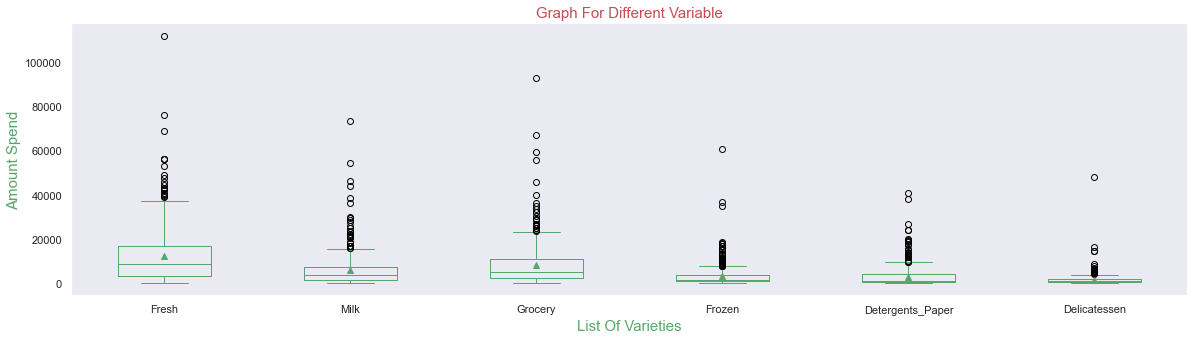

In [17]:
df1=df.drop(['Total_Spent','Buyer/Spender'],axis=1)
df1.boxplot(color='g',showmeans=True,vert=True,grid=False)
plt.rcParams["figure.figsize"]=(15,7)
plt.title("Graph For Different Variable",fontsize=15,color="r")
plt.ylabel("Amount Spend",fontsize=15,color='g')
plt.xlabel("List Of Varieties",fontsize=15,color='g');

## <font color= Green>Observation:</font>

In the Graph, we are able to descripe measures of vaiability like IQR, Variance, Outlier and means. Looking at the problem objective we have computed that, variable "Fresh" has the most inconsistent behaviour and variable "Detergents_Paper" has the leat inconsistent behaviour among all

## 1.4 ). Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

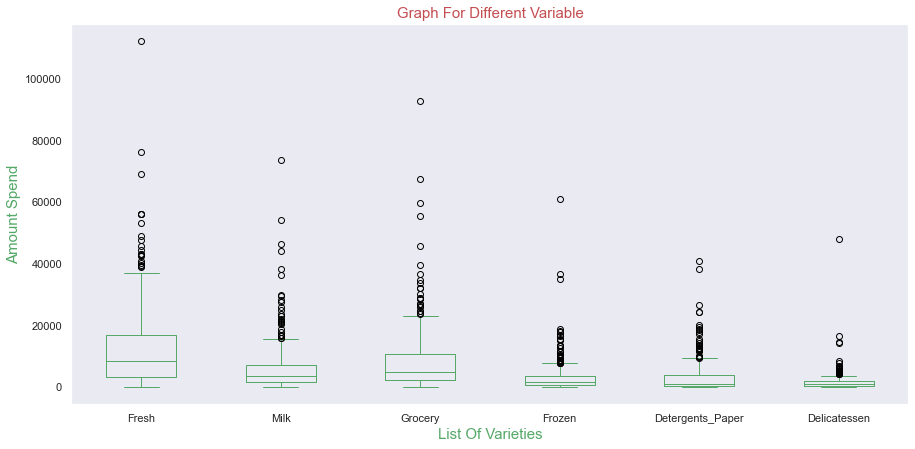

In [18]:
df1=df.drop(['Total_Spent','Buyer/Spender'],axis=1)
df1.boxplot(color='g',grid=False)
plt.rcParams["figure.figsize"]=(12,7)
plt.title("Graph For Different Variable",fontsize=15,color='r')
plt.ylabel("Amount Spend",fontsize=15,color='g')
plt.xlabel("List Of Varieties",fontsize=15,color='g');

## <font color= Green>Observation:</font>

Yes, there area outliers in the data which we can observe from the graph.

## 1.5 ). On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem?

## <font color= Green>Observation:</font>

As per observation, we have found that in <font color=blue>Hotel</font> the <font color='red'>'Fresh'</font> Varieble is consumed more and in <font color=blue>Retail</font> <font color=red> ('Grocery'</font> and <font color=red>'Millk')</font> are the product which is consumed in most. So, as conclusion it will be more profitable to invest more in these mentioned variable, according to their mentioned Channel.

# Problem 2

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

<font color=blue>Overview:</font>

In [19]:
df2=pd.read_csv("Survey-1.csv")

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [21]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,62.0,31.500000,18.041619,1.0,16.25,31.50,46.75,62.0
Age,62.0,21.129032,1.431311,18.0,20.00,21.00,22.00,26.0
GPA,62.0,3.129032,0.377388,2.3,2.90,3.15,3.40,3.9
Salary,62.0,48.548387,12.080912,25.0,40.00,50.00,55.00,80.0
Social Networking,62.0,1.516129,0.844305,0.0,1.00,1.00,2.00,4.0
Satisfaction,62.0,3.741935,1.213793,1.0,3.00,4.00,4.00,6.0
Spending,62.0,482.016129,221.953805,100.0,312.50,500.00,600.00,1400.0
Text Messages,62.0,246.209677,214.465950,0.0,100.00,200.00,300.00,900.0


In [22]:
df2.isna().sum().sort_values(ascending=False)

Text Messages        0
Computer             0
Spending             0
Satisfaction         0
Social Networking    0
Salary               0
Employment           0
GPA                  0
Grad Intention       0
Major                0
Class                0
Age                  0
Gender               0
ID                   0
dtype: int64

In [23]:
df2.isnull().sum().sort_values(ascending=False)

Text Messages        0
Computer             0
Spending             0
Satisfaction         0
Social Networking    0
Salary               0
Employment           0
GPA                  0
Grad Intention       0
Major                0
Class                0
Age                  0
Gender               0
ID                   0
dtype: int64

In [24]:
df2.shape

(62, 14)

## 2.1.). For this data, construct the following contingency tables (Keep Gender as row variable)

In [25]:
table2=round(pd.pivot_table(df2,values=['Age','Class','Major','Grad Intention','GPA','Employment','Salary','Social Networking','Satisfaction','Spending','Computer','Text Messages'],
                     index=['Gender'], aggfunc=np.sum),2)
table2

,Age,GPA,Salary,Satisfaction,Social Networking,Spending,Text Messages
Gender,,,,,,,
Female,696,104.6,1610.0,116,47,14920,7835
Male,614,89.4,1400.0,116,47,14965,7430


## 2.1.1.). Gender and Major

In [26]:
pd.crosstab(df2['Gender'],df2['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


## 2.1.2.). Gender and Grad Intention

In [27]:
pd.crosstab(df2['Gender'],df2['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


## 2.1.3.). Gender and Employment

In [28]:
pd.crosstab(df2['Gender'],df2['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


## 2.1.4.). Gender and Computer

In [29]:
pd.crosstab(df2.Gender,df2.Computer)

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


## 2.2.). Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

## 2.2.1.). What is the probability that a randomly selected CMSU student will be male?

In [30]:
print(df2['Gender'].value_counts())
print(" ")
print('Total number of students are', 33+29)
print(" ")
print('P(Male)= Number of Males/Total Number of Students')
print(" ")
print('P(Male)=',(29/62))

Female    33
Male      29
Name: Gender, dtype: int64
 
Total number of students are 62
 
P(Male)= Number of Males/Total Number of Students
 
P(Male)= 0.46774193548387094


## <font color=green>Observation:</font>

So, the probability that a randomly selected CMSU student of being male is 0.46774193548387094

## 2.2.2.). What is the probability that a randomly selected CMSU student will be female?

In [31]:
print(df2['Gender'].value_counts())
print(" ")
print('Total number of students are', 33+29)
print(" ")
print('P(Female)= Number of Females/Total Number of Students')
print(" ")
print('P(Female)=',(33/62))

Female    33
Male      29
Name: Gender, dtype: int64
 
Total number of students are 62
 
P(Female)= Number of Females/Total Number of Students
 
P(Female)= 0.532258064516129


## <font color=green>Observation:</font>

So, the probability that a randomly selected CMSU student of being female is 0.532258064516129

## 2.3.). Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

## 2.3.1.). Find the conditional probability of different majors among the male students in                CMSU.

In [32]:
pd.crosstab(df2.Major,df2.Gender,normalize="index",margins=True)

Gender,Female,Male
Major,,
Accounting,0.428571,0.571429
CIS,0.750000,0.250000
Economics/Finance,0.636364,0.363636
International Business,0.666667,0.333333
Management,0.400000,0.600000
Other,0.428571,0.571429
Retailing/Marketing,0.642857,0.357143
Undecided,0.000000,1.000000
All,0.532258,0.467742


In [33]:
pd.crosstab(df2.Major,df2.Gender,normalize="columns",margins=True)

Gender,Female,Male,All
Major,,,
Accounting,0.090909,0.137931,0.112903
CIS,0.090909,0.034483,0.064516
Economics/Finance,0.212121,0.137931,0.177419
International Business,0.121212,0.068966,0.096774
Management,0.121212,0.206897,0.161290
Other,0.090909,0.137931,0.112903
Retailing/Marketing,0.272727,0.172414,0.225806
Undecided,0.000000,0.103448,0.048387


<font color=Green>Ans:</font> So, as per above table we can see the probability of male students in different majors along with total probability.

## 2.3.2.). Find the conditional probability of different majors among the female students of CMSU.

In [34]:
pd.crosstab(df2.Major,df2.Gender,margins=True,normalize="index")

Gender,Female,Male
Major,,
Accounting,0.428571,0.571429
CIS,0.750000,0.250000
Economics/Finance,0.636364,0.363636
International Business,0.666667,0.333333
Management,0.400000,0.600000
Other,0.428571,0.571429
Retailing/Marketing,0.642857,0.357143
Undecided,0.000000,1.000000
All,0.532258,0.467742


In [35]:
pd.crosstab(df2.Major,df2.Gender,normalize="columns",margins=True)

Gender,Female,Male,All
Major,,,
Accounting,0.090909,0.137931,0.112903
CIS,0.090909,0.034483,0.064516
Economics/Finance,0.212121,0.137931,0.177419
International Business,0.121212,0.068966,0.096774
Management,0.121212,0.206897,0.161290
Other,0.090909,0.137931,0.112903
Retailing/Marketing,0.272727,0.172414,0.225806
Undecided,0.000000,0.103448,0.048387


<font color=Green>Ans:</font> So, as per above table we can see the probability of female students in different majors along with total probability.

## 2.4.). Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

## 2.4.1.). Find the probability That a randomly chosen student is a male and intends to graduate.

In [36]:
print(df2['Grad Intention'].value_counts())
print(" ")
print('The probability that a randomly selected CMSU student of being male is 0.46774193548387094')
print("and the probability of intend to graduate is",(28/(28+22+12)))
print('So, based on independent Mutiplication Rule')
print("P(Int. to Grad)*P(Male)")
print(" ")
print("=",0.45161290322580644*0.46774193548387094)


Yes          28
Undecided    22
No           12
Name: Grad Intention, dtype: int64
 
The probability that a randomly selected CMSU student of being male is 0.46774193548387094
and the probability of intend to graduate is 0.45161290322580644
So, based on independent Mutiplication Rule
P(Int. to Grad)*P(Male)
 
= 0.21123829344432882


## <font color=green>Observation:</font>

So the probability that a randomly chosen student is a male who intend to graduate is  0.21123829344432882

## 2.4.2.). Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [37]:
print(df2['Computer'].value_counts())
print(" ")
print("The probability that a randomly selected CMSU student of being female is 0.532258064516129")
print('Probability of not having Laptop is',(5+2)/(55+5+2))
print('So, based on independent Mutiplication Rule')
print("P(Not Having Laptop)*P(Female)")
print(" ")
print("=",0.11290322580645161*0.532258064516129)

Laptop     55
Desktop     5
Tablet      2
Name: Computer, dtype: int64
 
The probability that a randomly selected CMSU student of being female is 0.532258064516129
Probability of not having Laptop is 0.11290322580645161
So, based on independent Mutiplication Rule
P(Not Having Laptop)*P(Female)
 
= 0.060093652445369405


## <font color=green>Observation:</font>

So the probability that a randomly chosen student is a female who don't have Laptop is  0.060093652445369405

## 2.5.). Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

## 2.5.1.) Find the probability that a randomly chosen student is a male or has a full-time employment

In [38]:
print(df2['Employment'].value_counts())
print(' ')
print('The probability that a randomly selected CMSU student of being male is 0.46774193548387094')
print("Probability of having Full-Time employment is",10/(43+10+9))
print("So Based on Addition Rule")
print("P(Male)+P(Full-Time Employment)")
print(" ")
print("= ",0.46774193548387094+0.16129032258064516)

Part-Time     43
Full-Time     10
Unemployed     9
Name: Employment, dtype: int64
 
The probability that a randomly selected CMSU student of being male is 0.46774193548387094
Probability of having Full-Time employment is 0.16129032258064516
So Based on Addition Rule
P(Male)+P(Full-Time Employment)
 
=  0.6290322580645161


## <font color=green>Observation:</font>

So the probability that a radnomly chosen student is a male or has a full time employment is  0.6290322580645161

## 2.5.2.). Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [39]:
print(df2.Major.value_counts())
print(" ")
print("The probability that a randomly selected CMSU student of being female is 0.532258064516129")
print('Probability of internation business is',6/(14+11+10+7+7+6+4+3))
print('Probability of management is',10/(14+11+10+7+7+6+4+3))
print("P(Internation Business|Female)+P(Management|Female)")
print('     ',(0.0967741935483871/0.532258064516129)+(0.16129032258064516/0.532258064516129))
print('     ',(0.0967741935483871)+(0.16129032258064516/0.532258064516129))
print("So, the conditional probability of a female student of being randomly chosen as international business or management is",(0.0967741935483871/0.532258064516129)+(0.16129032258064516/0.532258064516129) )


Retailing/Marketing       14
Economics/Finance         11
Management                10
Other                      7
Accounting                 7
International Business     6
CIS                        4
Undecided                  3
Name: Major, dtype: int64
 
The probability that a randomly selected CMSU student of being female is 0.532258064516129
Probability of internation business is 0.0967741935483871
Probability of management is 0.16129032258064516
P(Internation Business|Female)+P(Management|Female)
      0.48484848484848486
      0.3998044965786901
So, the conditional probability of a female student of being randomly chosen as international business or management is 0.48484848484848486


## 2.6.).  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [40]:
df3=df2[(df2['Grad Intention']=='Yes') + (df2['Grad Intention']=='No')]
print("Yes, the graduate intention and being female are independent events.")
print("and to check the probability we will be using Multiplication Rule, which is ")
print(' ')
print("      ","P(Female or Yes) = P(Female)*P(Yes)")
print(' ')
print('So the probability of Graduate intention and being female is ',(20/40)*(28/40))
pd.crosstab(df2.Gender,df3['Grad Intention'])

Yes, the graduate intention and being female are independent events.
and to check the probability we will be using Multiplication Rule, which is 
 
       P(Female or Yes) = P(Female)*P(Yes)
 
So the probability of Graduate intention and being female is  0.35


Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


## 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

## Answer the following questions based on the data

## 2.7.1.). If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [41]:
pd.crosstab(df2.Gender,df2['GPA']<3,margins=True)

GPA,False,True,All
Gender,,,
Female,25,8,33
Male,20,9,29
All,45,17,62


The probability of GPA less than 3 is:<br>$$P(GPA<3)=17/62$$<br> 

<font color=green>Observation"</font>


So, the probability of GPA less than 3 is 0.27419354838709675

## 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [42]:
pd.crosstab(df2.Gender,df2['Salary']>=50,margins=True)


Salary,False,True,All
Gender,,,
Female,15,18,33
Male,15,14,29
All,30,32,62


The probability of randomly selected male earns 50 or more is"<br>$$P(Selected.male.earns.50.or.more)=14/29$$<br>$$P(Selected.female.earns.50.or.more)=18/33$$<br>

<font color=Green>Observation:</font>


So, the probability of randomly selected male earns 50 or more is 0.4827586206896552 .<br>So, the probability of randomly selected female earns 50 or more is 0.5454545454545454 .  

## 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions for this whole Problem 2.

Overview of "GPA"
 
count    62.000000
mean      3.129032
std       0.377388
min       2.300000
25%       2.900000
50%       3.150000
75%       3.400000
max       3.900000
Name: GPA, dtype: float64


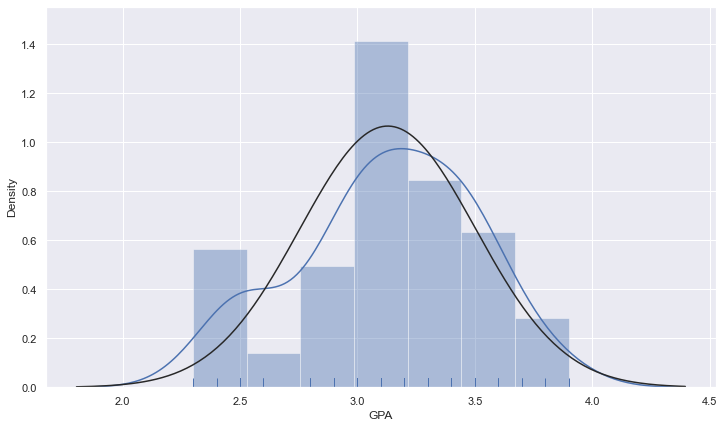

In [43]:
df5=df2[['GPA','Salary','Spending','Text Messages']].value_counts()
print('Overview of "GPA"')
print(' ')
print(df2['GPA'].describe(include='all').T)
sns.distplot(df2.GPA,rug=True,fit=stats.norm, kde=True);
plt.rcParams['figure.figsize']=(5,5)

Overview of "Salary"
 
count    62.000000
mean     48.548387
std      12.080912
min      25.000000
25%      40.000000
50%      50.000000
75%      55.000000
max      80.000000
Name: Salary, dtype: float64


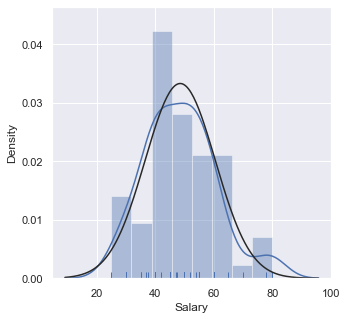

In [44]:
print('Overview of "Salary"')
print(' ')
print(df2['Salary'].describe(include='all').T)
sns.distplot(df2.Salary,rug=True,fit=stats.norm, kde=True)
plt.rcParams['figure.figsize']=(5,5)

Overview of "Spending"
 
count      62.000000
mean      482.016129
std       221.953805
min       100.000000
25%       312.500000
50%       500.000000
75%       600.000000
max      1400.000000
Name: Spending, dtype: float64


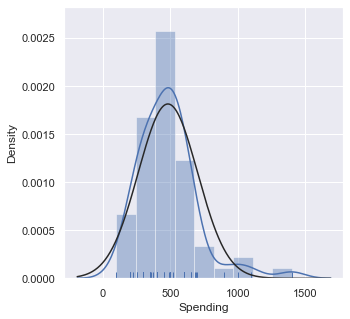

In [45]:
print('Overview of "Spending"')
print(' ')
print(df2['Spending'].describe(include='all').T)
sns.distplot(df2.Spending,rug=True,fit=stats.norm, kde=True,)
plt.rcParams['figure.figsize']=(5,5)

Overview of "Text Messages"
 
count     62.000000
mean     246.209677
std      214.465950
min        0.000000
25%      100.000000
50%      200.000000
75%      300.000000
max      900.000000
Name: Text Messages, dtype: float64


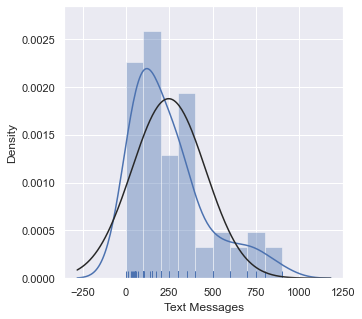

In [46]:
print('Overview of "Text Messages"')
print(' ')
print(df2['Text Messages'].describe(include='all').T)
sns.distplot(df2['Text Messages'],rug=True,fit=stats.norm, kde=True)
plt.rcParams['figure.figsize']=(5,5)

## <font color=Green>Observation:</font>

As per observation, we found that all four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages forms a Normal Distribution Bell Curve.

# Problem 3:

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.

In [47]:
df4=pd.read_csv('A+&+B+shingles.csv')

In [48]:
df4.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58
Unnamed: 2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

$$H_0:Mean Moisture=0.35$$<br>$$H_a:Mean Moisture>0.35$$<br>In this case, lets consider alpha as 0.05 as it is not specified

In [49]:
Mean_of_A=df4.A.mean()
STD_of_A=df4.A.std()
STD_of_B=df4.B.std()
Mean_of_B=df4.B.mean()
Count_A=df4["A"]
print('The mean of "A" is ',Mean_of_A,'and the mean of "B" is',Mean_of_B)
print(' ')
print('The Standard Deviation of "A" is ',STD_of_A,'and the Standard Deviation of "B" is',STD_of_B)
print(" ")
print("The number (n) of variables in column 'A' is ",df4['A'].count(),"and the number (n) of variables in column 'B' is ",df4['B'].count(),".")

The mean of "A" is  0.3166666666666666 and the mean of "B" is 0.2735483870967742
 
The Standard Deviation of "A" is  0.13573082605973166 and the Standard Deviation of "B" is 0.13729647694185443
 
The number (n) of variables in column 'A' is  36 and the number (n) of variables in column 'B' is  31 .


In [50]:
Ttest_A=stats.ttest_1samp(df4['A'],0.35)
Ttest_B=stats.ttest_1samp(df4['B'],0.35,nan_policy='omit')
print("For A : ","Ttest_1sampResult(statistic=-1.4735046253382782,", "pvalue=",0.14955266289815025/2)
print("For B : ","Ttest_1sampResult(statistic=-3.1003313069986995, pvalue=",0.004180954800638365/2)

For A :  Ttest_1sampResult(statistic=-1.4735046253382782, pvalue= 0.07477633144907513
For B :  Ttest_1sampResult(statistic=-3.1003313069986995, pvalue= 0.0020904774003191826


<font color= green>So, As per review:</font><br>For A Shingles : P_value is greater than alpha, So, in this case we have Failed Reject Null Hypothesis.

<font color=green>Whereas :</font><br>For B Shingles : P_value is smaller than alpha, So, in this case we have Rejected the Null Hypothesis.

## 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [51]:
print('The mean of "A" is ',Mean_of_A,'and the mean of "B" is',Mean_of_B)
print('The Standard Deviation of "A" is ',STD_of_A,'and the Standard Deviation of "B" is',STD_of_B)
print("The number (n) of variables in column 'A' is ",df4['A'].count(),"and the number (n) of variables in column 'B' is ",df4['B'].count(),".")
print(' ')
print(stats.shapiro(df4['A']))
print(stats.shapiro(df4['B']))
print(stats.levene(df4['A'],df4['B']))

The mean of "A" is  0.3166666666666666 and the mean of "B" is 0.2735483870967742
The Standard Deviation of "A" is  0.13573082605973166 and the Standard Deviation of "B" is 0.13729647694185443
The number (n) of variables in column 'A' is  36 and the number (n) of variables in column 'B' is  31 .
 
ShapiroResult(statistic=0.9375598430633545, pvalue=0.042670514434576035)
ShapiroResult(statistic=nan, pvalue=1.0)
LeveneResult(statistic=nan, pvalue=nan)


In [52]:
t_statistic, p_value=stats.ttest_ind(df4['A'],df4['B'],nan_policy='omit')
print("So, the T_stat is",t_statistic)
print('and the P_Value is',p_value)

So, the T_stat is 1.2896282719661123
and the P_Value is 0.2017496571835306


## <font color=green>Observation :</font><br>

P_value is greater than alpha, So, in this case we have Failed to Reject the Null Hypothesis.

## <font color=Green>THE END</font>